In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'D:\Data Engineering\Data Analytics\Movie Data Visualization\movies.csv')

In [2]:
# Data Insights
df[163:167]

name rating   genre  year  \
163                  Venom      R  Horror  1981   
164  Fort Apache the Bronx      R   Crime  1981   
165     Eyes of a Stranger      R  Horror  1981   
166   Zorro: The Gay Blade     PG  Action  1981   

                             released  score   votes        director  \
163  January 29, 1982 (United States)    5.8  2600.0   Piers Haggard   
164  February 6, 1981 (United States)    6.7  5800.0   Daniel Petrie   
165    March 27, 1981 (United States)    6.0  2400.0  Ken Wiederhorn   
166     July 17, 1981 (United States)    6.2  4100.0     Peter Medak   

               writer             star         country    budget       gross  \
163  Alan Scholefield     Klaus Kinski  United Kingdom       NaN   5229643.0   
164     Heywood Gould      Paul Newman   United States       NaN  29200000.0   
165          Ron Kurz     Lauren Tewes   United States  800000.0   1118634.0   
166       Hal Dresner  George Hamilton   United States       NaN         NaN   

                         company  runtime  
163           Morison Film Group     92.0  
164              Time Life Films    125.0  
165  Georgetown Productions Inc.     84.0  
166     Melvin Simon Productions     93.0

In [3]:
#Checking for null values
na_values= df['budget'].isna()
na_values

0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664     True
7665    False
7666    False
7667     True
Name: budget, Length: 7668, dtype: bool

In [4]:
# Checking the Missing Data 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#Count the NaN number 
NaN_count = df['budget'].isna().sum()
print("Total number of NaN values: ", NaN_count)

NaN_count_gross = df['gross'].isna().sum()
print("Total number of NaN values  in gross: ", NaN_count_gross)

Total number of NaN values:  2171
Total number of NaN values  in gross:  189


In [6]:
# df_original = df.copy()

In [7]:
# Calculating Mean and Replacing NAN with mean value in 
Budget_mean = df['budget'].mean()
gross_mean = df['gross'].mean()

df['budget']= df['budget'].fillna(Budget_mean, inplace = False)
df['gross']= df['gross'].fillna(gross_mean, inplace = False)

df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country        budget  \
0                Stephen King    Jack Nicholson  United Kingdom  1.900000e+07   
1     Henry De Vere Stacpoole    Brooke Shields   United States  4.500000e+06   
2              Leigh Brackett       Mark Hamill   United States  1.800000e+07   
3                Jim Abrahams       Robert Hays   United States  3.500000e+06   
4          Brian Doyle-Murray       Chevy Chase   United States  6.000000e+06   
...                       ...               ...             ...           ...   
7663            Joseph Ebanks      Shannon Bond   United States  7.000000e+03   
7664              Lisa Huston  Michael Saquella   United States  3.558988e+07   
7665             Lynno Lovert      Onyama Laura   United States  5.875000e+04   
7666            James Randall     Christina Roz   United States  1.500000e+04   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa  3.558988e+07   

             gross                    company  runtime  
0     4.699877e+07               Warner Bros.    146.0  
1     5.885311e+07          Columbia Pictures    104.0  
2     5.383751e+08                  Lucasfilm    124.0  
3     8.345354e+07         Paramount Pictures     88.0  
4     3.984634e+07             Orion Pictures     98.0  
...            ...                        ...      ...  
7663  7.850054e+07                        NaN     90.0  
7664  7.850054e+07  Cactus Blue Entertainment     90.0  
7665  7.850054e+07           Embi Productions      NaN  
7666  7.850054e+07                        NaN    120.0  
7667  7.850054e+07                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [8]:
# Convrting Float to INT

df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [9]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States  35589876   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa  35589876   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663   78500541                        NaN     90.0  
7664   78500541  Cactus Blue Entertainment     90.0  
7665   78500541           Embi Productions      NaN  
7666   78500541                        NaN    120.0  
7667   78500541                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [10]:
# Split the date and country column
df[['Correct_date', 'Correct_country']] = df['released'].str.extract(r'^(.*) \((.*)\)$')

# Convert the date column to datetime format and extract the year
df['Correct_year'] = pd.to_datetime(df['Correct_date'],errors = 'coerce').dt.year.fillna(0).astype('int64')

df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States  35589876   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa  35589876   

          gross                    company  runtime      Correct_date  \
0      46998772               Warner Bros.    146.0     June 13, 1980   
1      58853106          Columbia Pictures    104.0      July 2, 1980   
2     538375067                  Lucasfilm    124.0     June 20, 1980   
3      83453539         Paramount Pictures     88.0      July 2, 1980   
4      39846344             Orion Pictures     98.0     July 25, 1980   
...         ...                        ...      ...               ...   
7663   78500541                        NaN     90.0  October 23, 2020   
7664   78500541  Cactus Blue Entertainment     90.0  February 7, 2020   
7665   78500541           Embi Productions      NaN    April 27, 2020   
7666   78500541                        NaN    120.0   October 1, 2020   
7667   78500541                PK 65 Films    102.0   August 19, 2020   

     Correct_country  Correct_year  
0      United States          1980  
1      United States          1980  
2      United States          1980  
3      United States          1980  
4      United States          1980  
...              ...           ...  
7663   United States          2020  
7664   United States          2020  
7665        Cameroon       

In [11]:
# Validating all the data types
print(df.dtypes)

name                object
rating              object
genre               object
year                 int64
released            object
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget               int64
gross                int64
company             object
runtime            float64
Correct_date        object
Correct_country     object
Correct_year         int64
dtype: object


In [12]:
# Changing Data type of Column

df['budget']= df['budget'].astype('int')

#df['gross']= df['gross'].astype('int64')

<AxesSubplot:>

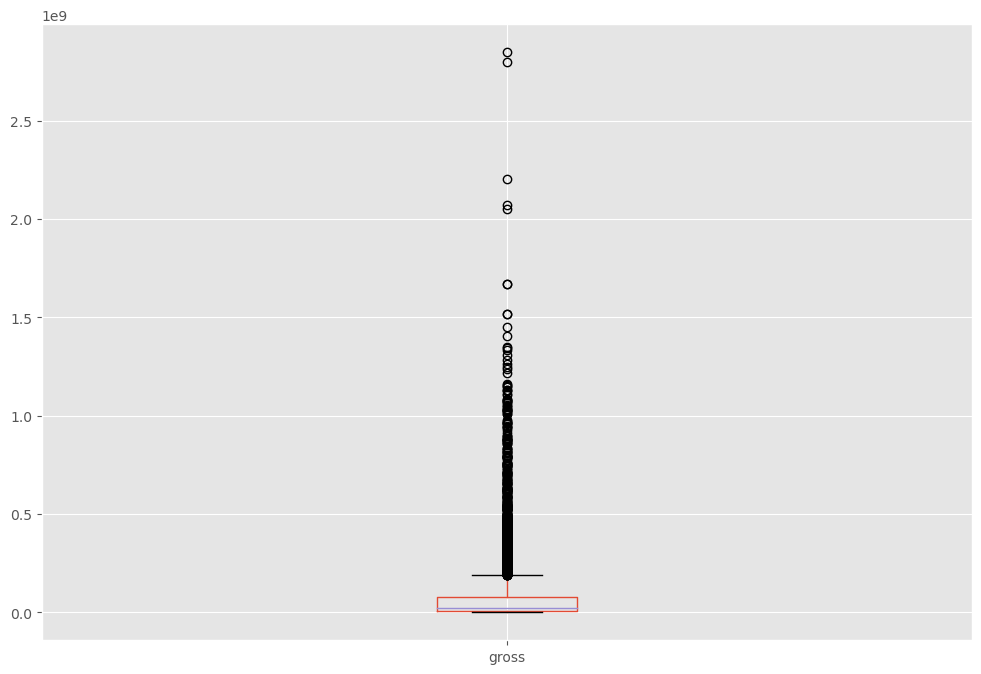

In [13]:
# checking for Outliers
df.boxplot(column=['gross'])

In [14]:
# Dropping  duplicates values
df.drop_duplicates()

#df['company'].drop_duplicates().sort_values(ascending= False)

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States  35589876   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa  35589876   

          gross                    company  runtime      Correct_date  \
0      46998772               Warner Bros.    146.0     June 13, 1980   
1      58853106          Columbia Pictures    104.0      July 2, 1980   
2     538375067                  Lucasfilm    124.0     June 20, 1980   
3      83453539         Paramount Pictures     88.0      July 2, 1980   
4      39846344             Orion Pictures     98.0     July 25, 1980   
...         ...                        ...      ...               ...   
7663   78500541                        NaN     90.0  October 23, 2020   
7664   78500541  Cactus Blue Entertainment     90.0  February 7, 2020   
7665   78500541           Embi Productions      NaN    April 27, 2020   
7666   78500541                        NaN    120.0   October 1, 2020   
7667   78500541                PK 65 Films    102.0   August 19, 2020   

     Correct_country  Correct_year  
0      United States          1980  
1      United States          1980  
2      United States          1980  
3      United States          1980  
4      United States          1980  
...              ...           ...  
7663   United States          2020  
7664   United States          2020  
7665        Cameroon       

In [15]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56569922347
Universal Pictures           52592689431
Columbia Pictures            43008941346
Paramount Pictures           40572107956
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9387231187
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [16]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1+2 Seisaku Iinkai                  2000    1196218
10 West Studios                     2010     814906
...                                             ...
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
iDeal Partners Film Fund            2013     506303
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[4536 rows x 1 columns]

In [17]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [18]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56569922347
Universal Pictures           52592689431
Columbia Pictures            43008941346
Paramount Pictures           40572107956
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9387231187
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [19]:
# Sorting Data in order
df.sort_values(by=['gross'],inplace=False, ascending = False)


name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
3818                        Love, Honor and Obey          R  Comedy  2000   
7625                            The Untold Story        NaN  Comedy  2019   
7580                         Run with the Hunted  Not Rated   Crime  2019   
2417                                    Madadayo        NaN   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes         director  \
5445  December 18, 2009 (United States)    7.8  1100000.0    James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0    Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0    James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
...                                 ...    ...        ...              ...   
3818   February 9, 2001 (United States)    6.5     5200.0  Dominic Anciano   
7625   January 11, 2019 (United States)    5.7      320.0    Shane Stanley   
7580      June 26, 2020 (United States)    5.2      735.0        John Swab   
2417             April 17, 1993 (Japan)    7.3     5100.0   Akira Kurosawa   
3203           October 1, 1997 (Brazil)    5.7     5800.0     George Huang   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
3818     Dominic Anciano        Sadie Frost  United Kingdom   35589876   
7625         Lee Stanley        Miko Hughes   United States   35589876   
7580           John Swab        Ron Perlman   United States   35589876   
2417        Ishirô Honda   Tatsuo Matsumura           Japan   11900000   
3203           Andy Burg       Will Friedle   United States   15000000   

           gross                                 company  runtime  \
5445  2847246203                   Twentieth Century Fox    162.0   
7445  2797501328                          Marvel Studios    181.0   
3045  2201647264                   Twentieth Century Fox    194.0   
6663  2069521700                               Lucasfilm    138.0   
7244  2048359754                          Marvel Studios    149.0   
...          ...                                     ...      ...   
3818        1400  British Broadcasting Corporation (BBC)    103.0   
7625         790               Visual Arts Entertainment    104.0   
7580         682                           Roxwell Films     93.0   
2417         596          DENTSU Music And Entertainment    134.0   
3203         309                                Daybreak     85.0   

           Correct_date Correct_country  Correct_year  
5445  December 18, 2009   United States          2009  
7445     April 26, 2019   United States          2019  
3045  December 19, 1997   United States          1997  
6663  December 18, 2015   United States          2015  
7244     April 27, 2018   United States          2018  
...                 ...             ...           ...  
3818   February 9, 2001   United States          2001  
7625   January 1

In [20]:
# Shows All Data instead of  dots in the middle
pd.set_option('display.max_rows', None)

# Cleaning Process Done

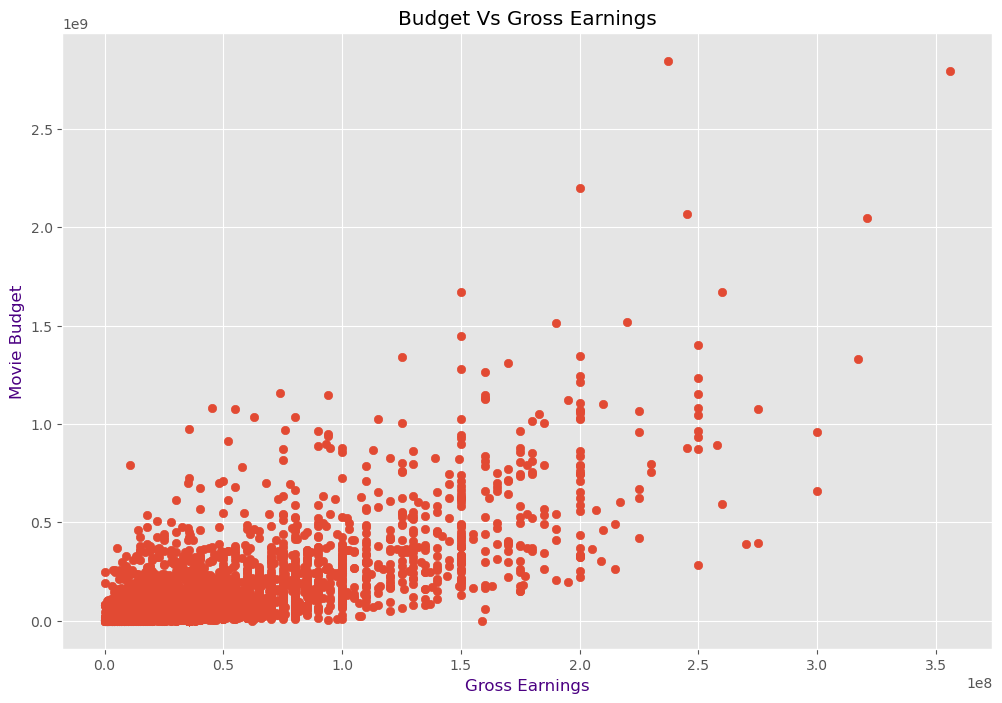

In [21]:
# scatter Plot Budget Vs Gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings',color= 'indigo')
plt.ylabel('Movie Budget',color= 'indigo')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

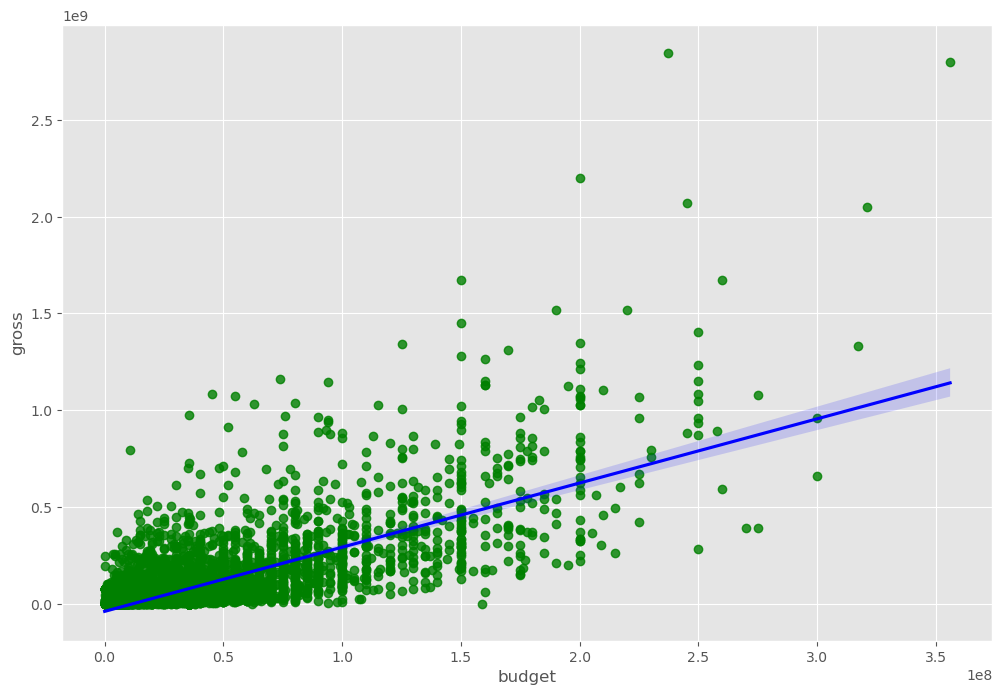

In [22]:
# plotting budget vs gross in seaborn as a regression plot
sns.regplot(x='budget', y='gross', data = df, scatter_kws = {"color":"green"},line_kws ={"color":"blue"})
                                                             

<AxesSubplot:xlabel='rating', ylabel='gross'>

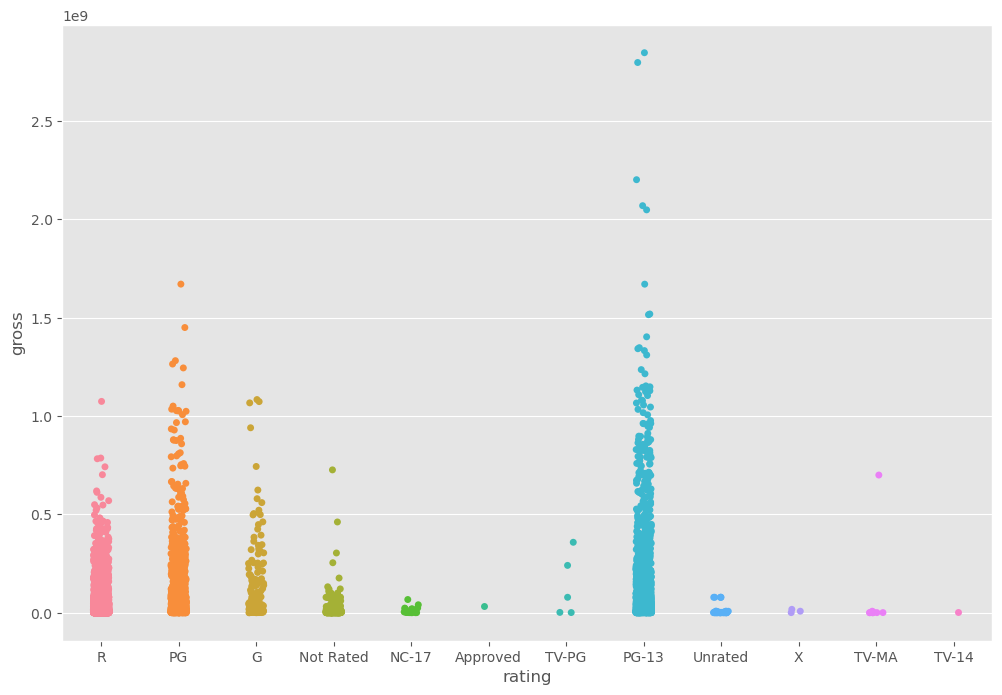

In [23]:
sns.stripplot(x="rating", y="gross", data=df)

In [24]:
# sns.swarmplot(x="rating", y="gross", data=df)

In [25]:
# Correlation Matrix between all numeric columns
df.corr()

year     score     votes    budget     gross   runtime  \
year          1.000000  0.097995  0.222945  0.265578  0.252042  0.120811   
score         0.097995  1.000000  0.409182  0.064554  0.182868  0.399451   
votes         0.222945  0.409182  1.000000  0.421090  0.628713  0.309212   
budget        0.265578  0.064554  0.421090  1.000000  0.711270  0.265305   
gross         0.252042  0.182868  0.628713  0.711270  1.000000  0.241336   
runtime       0.120811  0.399451  0.309212  0.265305  0.241336  1.000000   
Correct_year  0.312521  0.045473  0.070314  0.084750  0.080151  0.120636   

              Correct_year  
year              0.312521  
score             0.045473  
votes             0.070314  
budget            0.084750  
gross             0.080151  
runtime           0.120636  
Correct_year      1.000000

In [26]:
# Implemantion of method like pearson, kendall and spearman
df.corr(method ='pearson')

year     score     votes    budget     gross   runtime  \
year          1.000000  0.097995  0.222945  0.265578  0.252042  0.120811   
score         0.097995  1.000000  0.409182  0.064554  0.182868  0.399451   
votes         0.222945  0.409182  1.000000  0.421090  0.628713  0.309212   
budget        0.265578  0.064554  0.421090  1.000000  0.711270  0.265305   
gross         0.252042  0.182868  0.628713  0.711270  1.000000  0.241336   
runtime       0.120811  0.399451  0.309212  0.265305  0.241336  1.000000   
Correct_year  0.312521  0.045473  0.070314  0.084750  0.080151  0.120636   

              Correct_year  
year              0.312521  
score             0.045473  
votes             0.070314  
budget            0.084750  
gross             0.080151  
runtime           0.120636  
Correct_year      1.000000

In [27]:
df.corr(method ='kendall')

year     score     votes    budget     gross   runtime  \
year          1.000000  0.067652  0.331465  0.144258  0.182415  0.097184   
score         0.067652  1.000000  0.300115  0.003530  0.080368  0.283611   
votes         0.331465  0.300115  1.000000  0.161853  0.507896  0.198240   
budget        0.144258  0.003530  0.161853  1.000000  0.258476  0.161757   
gross         0.182415  0.080368  0.507896  0.258476  1.000000  0.156061   
runtime       0.097184  0.283611  0.198240  0.161757  0.156061  1.000000   
Correct_year  0.986854  0.073699  0.325364  0.140875  0.173360  0.096999   

              Correct_year  
year              0.986854  
score             0.073699  
votes             0.325364  
budget            0.140875  
gross             0.173360  
runtime           0.096999  
Correct_year      1.000000

In [28]:
df.corr(method ='spearman')

year     score     votes    budget     gross   runtime  \
year          1.000000  0.099045  0.469829  0.202558  0.267101  0.142977   
score         0.099045  1.000000  0.428138  0.004735  0.118024  0.399857   
votes         0.469829  0.428138  1.000000  0.235205  0.688537  0.290159   
budget        0.202558  0.004735  0.235205  1.000000  0.361668  0.227921   
gross         0.267101  0.118024  0.688537  0.361668  1.000000  0.227892   
runtime       0.142977  0.399857  0.290159  0.227921  0.227892  1.000000   
Correct_year  0.996530  0.107995  0.462100  0.197656  0.253775  0.142915   

              Correct_year  
year              0.996530  
score             0.107995  
votes             0.462100  
budget            0.197656  
gross             0.253775  
runtime           0.142915  
Correct_year      1.000000

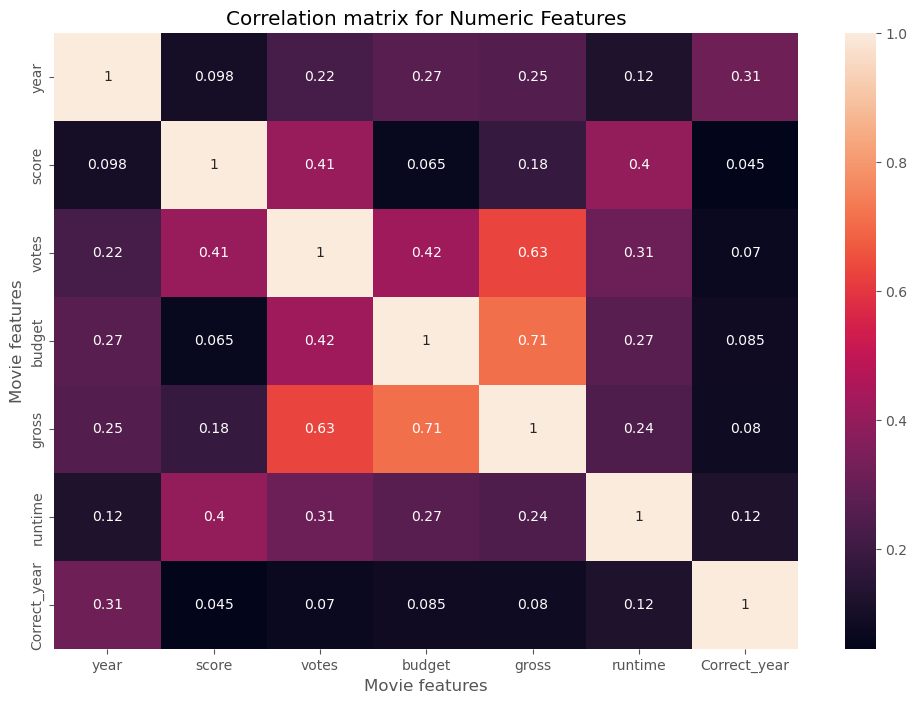

In [29]:
# Heatmap
correlation_matrix = df.corr('pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [30]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime   Correct_date Correct_country  \
0   46998772        Warner Bros.    146.0  June 13, 1980   United States   
1   58853106   Columbia Pictures    104.0   July 2, 1980   United States   
2  538375067           Lucasfilm    124.0  June 20, 1980   United States   
3   83453539  Paramount Pictures     88.0   July 2, 1980   United States   
4   39846344      Orion Pictures     98.0  July 25, 1980   United States   

   Correct_year  
0          1980  
1          1980  
2          1980  
3          1980  
4          1980

In [31]:
#Converting every column to Numeric
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16    1900       6      6  1980      2286    6.6    21000.0        49     735   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19    5189       6      4  1980       626    6.8    26000.0      2561     556   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
24    7127       4      6  1980      1913    6.4    14000.0      1153      12   
25     346       6     10  1980       773    6.9    33000.0      1583    3234   
26    3263       6      4  1980      2059    6.5     5100.0      2433    2483   
27    4442       4      0  1980       281    5.0     4100.0      1282      33   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
30    3796       4      4  1980      3296    7.1     8900.0      2811      83   
31    4373       6     10  1980      1467    5.4    16000.0      2143    4455   
32    4987       4      0  1980       342    5.3    15000.0      1041    1587   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
34    4785       4      4  1980       699    6.7     9100.0      1225    3136   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
38    6102       4      6  1980       699    5.9     4000.0      2296    3826   
39    1244       4      3  1980      2195    7.5    17000.0      1884    4201   
40    6748       4      7  1980      3101    6.3     5700.0      1403     518   
41     927       4      6  1980      1588    7.9    13000.0       335    2252   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
43    7305       6      3  1980       169    6.6    11000.0       186    1682   
44    5504       6     10  1980      3042    4.8     2000.0      1978     151   
45    1152       6      4  1980      1467    6.1    12000.0      2804    4298   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
47    5578       6     10  1980      2775    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

In [32]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name             1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating          -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre            0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year             0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released        -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score            0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes            0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director         0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer           0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star             0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country         -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget           0.020368 -0.126046 -0.310566  0.265578  0.012263  0.064554   
gross            0.005466 -0.102116 -0.230267  0.252042  0.001636  0.182868   
company          0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime          0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
Correct_date    -0.011223  0.015735  0.029039 -0.000832  0.999912  0.042918   
Correct_country -0.001968  0.023977 -0.091572 -0.089289 -0.044096 -0.092763   
Correct_year    -0.010642 -0.007922 -0.035768  0.312521  0.024619  0.045473   

                    votes  director    writer      star   country    budget  \
name             0.013088  0.009079  0.009081  0.006472 -0.010737  0.020368   
rating           0.033225  0.019483 -0.005921  0.013405  0.081244 -0.126046   
genre           -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.310566   
year             0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.265578   
released         0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.012263   
score            0.409182  0.009559  0.019416 -0.001609 -0.133348  0.064554   
votes            1.000000  0.000260  0.000892 -0.019282  0.073625  0.421090   
director         0.000260  1.000000  0.299067  0.039234  0.017490 -0.010364   
writer           0.000892  0.299067  1.000000  0.027245  0.015343 -0.033216   
star            -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.016628   
country          0.073625  0.017490  0.015343 -0.012998  1.000000  0.039000   
budget           0.421090 -0.010364 -0.033216 -0.016628  0.039000  1.000000   
gross            0.628713 -0.014272 -0.023210 -0.002682  0.089949  0.711270   
company          0.133204  0.004404  0.005646  0.012442  0.095548  0.144851   
runtime          0.309212  0.017624 -0.003511  0.010174 -0.078412  0.265305   
Correct_date     0.017111 -0.001275 -0.002421  0.015597 -0.020063  0.013713   
Correct_country  0.092014  0.013331 -0.001201 -0.023540  0.297363  0.083633   
Correct_year     0.070314 -0.005853  0.003654 -0.009503  0.024378  0.084750   

                    gross   company   runtime  Correct_date  Correct_country  \
name             0.005466  0.009211  0.010392     -0.011223        -0.001968   
rating          -0.102116 -0.032943  0.062145      0.015735         0.023977   
genre           -0.230267 -0.071067 -0.052711      0.029039        -0.091572   
year             0.252042 -0.010431  0.120811     -0.000832        -0.089289   
released         0.001636 -0.010474  0.000868      0.999912        -0.044096   
score            0.182868  0.001030  0.399451      0.042918        -0.092763   
votes            0.628713  0.133204  0.309212      0.017111         0.092014   
director        -0.014272  0.004404  0.017624     -0.001275         0.013331   
writer          -0.023210  0.005646 -0.003511     -0.002421        -0.001201   
star            -0.002682  0.012442  0.010174      0.015597        -0.023540   
country          0.089949  0.095548 -0.078412     -0.020063         0.297363   
budget           0.711270  0.144851  0.265305      0.0137

In [33]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name             name               1.000000
                 rating            -0.008069
                 genre              0.016355
                 year               0.011453
                 released          -0.011311
                 score              0.017097
                 votes              0.013088
                 director           0.009079
                 writer             0.009081
                 star               0.006472
                 country           -0.010737
                 budget             0.020368
                 gross              0.005466
                 company            0.009211
                 runtime            0.010392
                 Correct_date      -0.011223
                 Correct_country   -0.001968
                 Correct_year      -0.010642
rating           name              -0.008069
                 rating             1.000000
                 genre              0.072423
                 year               0.008779
          

In [34]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget           genre             -0.310566
genre            budget            -0.310566
                 gross             -0.230267
gross            genre             -0.230267
genre            votes             -0.145307
votes            genre             -0.145307
country          score             -0.133348
score            country           -0.133348
rating           budget            -0.126046
budget           rating            -0.126046
rating           gross             -0.102116
gross            rating            -0.102116
score            Correct_country   -0.092763
Correct_country  score             -0.092763
genre            Correct_country   -0.091572
Correct_country  genre             -0.091572
year             Correct_country   -0.089289
Correct_country  year              -0.089289
genre            year              -0.081261
year             genre             -0.081261
country          runtime           -0.078412
runtime          country           -0.078412
genre     

In [35]:
high_corr=sorted_pairs[(sorted_pairs) >0.5]
high_corr

gross            votes              0.628713
votes            gross              0.628713
budget           gross              0.711270
gross            budget             0.711270
Correct_date     released           0.999912
released         Correct_date       0.999912
name             name               1.000000
Correct_date     Correct_date       1.000000
rating           rating             1.000000
genre            genre              1.000000
year             year               1.000000
released         released           1.000000
score            score              1.000000
votes            votes              1.000000
Correct_country  Correct_country    1.000000
director         director           1.000000
star             star               1.000000
country          country            1.000000
budget           budget             1.000000
gross            gross              1.000000
company          company            1.000000
runtime          runtime            1.000000
writer    

In [36]:
# Star and Company have the highest correlation to gross earnings.